Listen to the validation/training set to see if it is too easy/hard

## Validation set

In [4]:
import glob
import os

import numpy as np
import pydub
import tensorflow as tf

from IPython.display import Audio

In [186]:
import matplotlib.pyplot as plt

In [179]:
TF_RECORD_DIR = '/scratch1/ilya/locDoc/data/alexa/v7.4/val_19680'
tfrecord_files_val = glob.glob(os.path.join(TF_RECORD_DIR, '*.tfrecord'))
tfrecord_file = tfrecord_files[0]

In [196]:
spec_h = 257 # expected

positive_examples = []
negative_examples = []
n_to_read = 10
class LimitExceded(Exception): pass
running_min = 1
running_max = 0

try:
    for tfrecord_file in tfrecord_files_val:
        for i, example in enumerate(tf.python_io.tf_record_iterator(tfrecord_file)):
            eg_np = tf.train.Example.FromString(example)
            
            spec = np.array(eg_np.features.feature["spectrogram"].float_list.value)
            running_min = min(running_min, spec.min())
            running_max = max(running_max, spec.max())
            if n_to_read == 1:
                print('Length of spec is {}, which is {} x {}'.format(len(spec), spec_h, len(spec) / float(spec_h)))
            
            audio_segment = pydub.AudioSegment(
                eg_np.features.feature["audio"].bytes_list.value[0], 
                frame_rate=16000,
                sample_width=2, 
                channels=1
            )
            y = audio_segment.get_array_of_samples()

            labs = np.array(eg_np.features.feature["spectrogram_label"].int64_list.value)
            if labs.max() == 1:
                positive_examples.append(y)
            else:
                negative_examples.append(y)

            n_to_read -= 1
            if n_to_read <= 0:
                raise LimitExceded
except LimitExceded:
    print('Found {} positive examples and {} negative examples'.format(len(positive_examples), len(negative_examples)))
    print('Spectrogram values are between {} and {}'.format(running_min, running_max))

Length of spec is 31868, which is 257 x 124.0
Found 5 positive examples and 5 negative examples
Spectrogram values are between 0.16181325912475586 and 2.958719491958618


In [208]:
spec2.shape

(31868,)

In [197]:
spec2 = (spec - 0.33527068902805535) / (0.04321428860254933**0.5)

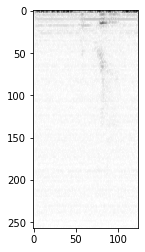

In [200]:
plt.figure()
plt.imshow(spec2.reshape(257,-1), cmap='Greys')

In [ ]:
sound_i = -1
sound_j = -1

In [166]:
sound_i += 1
Audio(positive_examples[sound_i], rate=16000)

In [170]:
sound_j += 1
Audio(negative_examples[sound_j], rate=16000)

## Training set

In [ ]:
# TODO